In [16]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

import pandas as pd
import numpy as np


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
response = requests.get(url, verify=False)

with open("forestfires.csv", "wb") as file:
    file.write(response.content)

fire = pd.read_csv("forestfires.csv")
print(fire.head(2))

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0


In [17]:
cols_to_keep = ['temp','wind','rain','area']
df = fire

In [18]:
arr = df[cols_to_keep].values

In [19]:
print(arr.shape)

(517, 4)


In [20]:
subset_arr = arr[:, :2]

In [21]:
print(subset_arr)

[[ 8.2  6.7]
 [18.   0.9]
 [14.6  1.3]
 ...
 [21.2  6.7]
 [25.6  4. ]
 [11.8  4.5]]


In [22]:
arr_transposed = arr.T

In [23]:
print(arr_transposed)

[[ 8.2  18.   14.6  ... 21.2  25.6  11.8 ]
 [ 6.7   0.9   1.3  ...  6.7   4.    4.5 ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ... 11.16  0.    0.  ]]


In [24]:
print(arr_transposed.shape)

(4, 517)


In [25]:
z = np.sqrt(arr[:,0])

In [26]:
print(z)

[2.86356421 4.24264069 3.82099463 2.88097206 3.3763886  4.7116876
 4.90917508 2.82842712 3.61939221 4.77493455 4.21900462 4.39317653
 4.12310563 4.6151923  5.13809303 4.78539445 3.88587185 4.08656335
 3.98748041 3.04959014 4.27784993 4.37035468 4.58257569 4.41588043
 4.86826458 4.03732585 4.35889894 4.40454311 5.49545267 4.77493455
 5.03984127 3.34664011 4.53872229 4.20713679 4.60434577 4.2661458
 4.65832588 3.36154726 4.21900462 3.75499667 4.82700735 4.28952212
 4.07430976 4.42718872 3.591657   5.08920426 3.8340579  4.79583152
 3.43511281 3.31662479 4.5607017  4.63680925 4.51663592 4.51663592
 4.19523539 5.26307895 4.21900462 3.71483512 3.72827038 3.50713558
 3.39116499 2.34520788 4.33589668 4.5607017  4.80624594 4.31277173
 4.79583152 4.42718872 4.42718872 4.14728827 3.97492138 4.20713679
 3.94968353 4.15932687 5.25357021 2.58843582 3.96232255 2.88097206
 3.8340579  4.64758002 4.41588043 4.23083916 4.31277173 4.07430976
 4.49444101 4.63680925 5.03984127 4.73286383 5.02991054 4.171330

In [27]:
print(z.shape)

(517,)


In [28]:
eye = np.eye(517)

In [29]:
print(eye)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [30]:
ez = eye @ z

In [31]:
print(ez)

[2.86356421 4.24264069 3.82099463 2.88097206 3.3763886  4.7116876
 4.90917508 2.82842712 3.61939221 4.77493455 4.21900462 4.39317653
 4.12310563 4.6151923  5.13809303 4.78539445 3.88587185 4.08656335
 3.98748041 3.04959014 4.27784993 4.37035468 4.58257569 4.41588043
 4.86826458 4.03732585 4.35889894 4.40454311 5.49545267 4.77493455
 5.03984127 3.34664011 4.53872229 4.20713679 4.60434577 4.2661458
 4.65832588 3.36154726 4.21900462 3.75499667 4.82700735 4.28952212
 4.07430976 4.42718872 3.591657   5.08920426 3.8340579  4.79583152
 3.43511281 3.31662479 4.5607017  4.63680925 4.51663592 4.51663592
 4.19523539 5.26307895 4.21900462 3.71483512 3.72827038 3.50713558
 3.39116499 2.34520788 4.33589668 4.5607017  4.80624594 4.31277173
 4.79583152 4.42718872 4.42718872 4.14728827 3.97492138 4.20713679
 3.94968353 4.15932687 5.25357021 2.58843582 3.96232255 2.88097206
 3.8340579  4.64758002 4.41588043 4.23083916 4.31277173 4.07430976
 4.49444101 4.63680925 5.03984127 4.73286383 5.02991054 4.171330

In [32]:
mean_z = np. mean(z)
mean_z

4.28474129298793

In [33]:
mz = z[z>=2]
mz

array([2.86356421, 4.24264069, 3.82099463, 2.88097206, 3.3763886 ,
       4.7116876 , 4.90917508, 2.82842712, 3.61939221, 4.77493455,
       4.21900462, 4.39317653, 4.12310563, 4.6151923 , 5.13809303,
       4.78539445, 3.88587185, 4.08656335, 3.98748041, 3.04959014,
       4.27784993, 4.37035468, 4.58257569, 4.41588043, 4.86826458,
       4.03732585, 4.35889894, 4.40454311, 5.49545267, 4.77493455,
       5.03984127, 3.34664011, 4.53872229, 4.20713679, 4.60434577,
       4.2661458 , 4.65832588, 3.36154726, 4.21900462, 3.75499667,
       4.82700735, 4.28952212, 4.07430976, 4.42718872, 3.591657  ,
       5.08920426, 3.8340579 , 4.79583152, 3.43511281, 3.31662479,
       4.5607017 , 4.63680925, 4.51663592, 4.51663592, 4.19523539,
       5.26307895, 4.21900462, 3.71483512, 3.72827038, 3.50713558,
       3.39116499, 2.34520788, 4.33589668, 4.5607017 , 4.80624594,
       4.31277173, 4.79583152, 4.42718872, 4.42718872, 4.14728827,
       3.97492138, 4.20713679, 3.94968353, 4.15932687, 5.25357

In [34]:
sd_mz = np.std(z)
sd_mean = np.mean(z)
print((sd_mean,sd_mz))

(4.28474129298793, 0.7281210961743274)


In [35]:
cz = np.clip(arr, 2.4, 2.6)
cz

array([[2.6, 2.6, 2.4, 2.4],
       [2.6, 2.4, 2.4, 2.4],
       [2.6, 2.4, 2.4, 2.4],
       ...,
       [2.6, 2.6, 2.4, 2.6],
       [2.6, 2.6, 2.4, 2.4],
       [2.6, 2.6, 2.4, 2.4]])

In [36]:
import matplotlib.pyplot as plt

(array([  1.,  17.,   6.,  16.,  40.,  73., 139., 139.,  66.,  20.]),
 array([1.4832397 , 1.91197725, 2.3407148 , 2.76945235, 3.19818991,
        3.62692746, 4.05566501, 4.48440256, 4.91314011, 5.34187767,
        5.77061522]),
 <BarContainer object of 10 artists>)

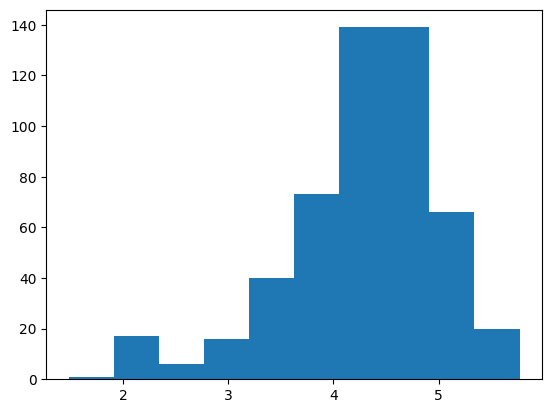

In [38]:
plt.hist(z)


(array([ 20.,   3.,  12.,  37.,  48., 100., 136.,  96.,  48.,  16.]),
 array([2.04939015, 2.42151266, 2.79363517, 3.16575767, 3.53788018,
        3.91000269, 4.28212519, 4.6542477 , 5.02637021, 5.39849271,
        5.77061522]),
 <BarContainer object of 10 artists>)

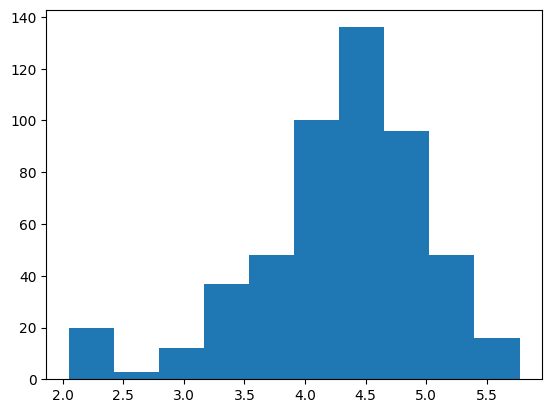

In [39]:
plt.hist(mz)


(array([[  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 516.],
        [112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 405.],
        [516.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [322.,   0.,   1.,   1.,   0.,   1.,   1.,   1.,   1., 189.]]),
 array([2.4 , 2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 ]),
 <a list of 4 BarContainer objects>)

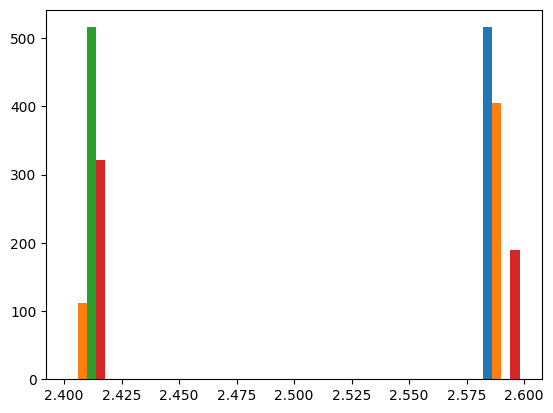

In [40]:
plt.hist(cz)

In [45]:
from numpy.random import seed
from numpy.random import normal

seed(314)

dev = normal(loc=0, scale=1, size=20)

print(dev)


[ 0.16608544  0.78196448  0.85228509 -0.70707096 -0.93165719  0.88666088
 -0.22178966  0.38172358 -0.77257544  0.86298719 -0.28126003 -0.93192543
 -0.49853725  0.76432549  0.19150443 -0.61876383  1.66571909  1.7381882
  1.18222626  1.11937572]


In [55]:
np.random.seed(314)

In [56]:
random_values = np.random.randn(100)
print(random_values)

[ 0.16608544  0.78196448  0.85228509 -0.70707096 -0.93165719  0.88666088
 -0.22178966  0.38172358 -0.77257544  0.86298719 -0.28126003 -0.93192543
 -0.49853725  0.76432549  0.19150443 -0.61876383  1.66571909  1.7381882
  1.18222626  1.11937572 -1.86605484 -0.63641398 -0.76091643  2.66405306
  0.16817076  0.18136585  1.32135902  0.43781928  0.19675917 -1.52956799
 -0.33748039 -0.96137142 -0.23133548 -1.14722501 -0.42294534  1.33054696
 -0.92783383  0.10527984 -1.09755663 -0.87038088 -0.88290362  0.3992024
  0.05468922 -0.84956149  0.98628471  0.29593524  1.70984745 -0.37751821
 -0.27393571 -1.13925738 -0.40426538 -0.89955014 -0.45587449  0.21859313
  0.65897885 -1.15106527 -0.17038979 -1.01244879  0.17762838 -1.24809581
  0.36346598  1.48327704 -0.28145836  0.41544126 -0.54829399  0.24367764
 -0.37245552  0.86221593 -1.40354516  1.41368913 -0.44068334  1.20110936
 -1.47307629 -0.15802795 -0.67009457 -1.02665006  1.2861011   0.15637034
 -0.83163134  1.89373309  1.79107898  0.09053548  0.0

In [57]:
np.random.seed(314)

In [58]:
num_walks = 10
num_steps = 100

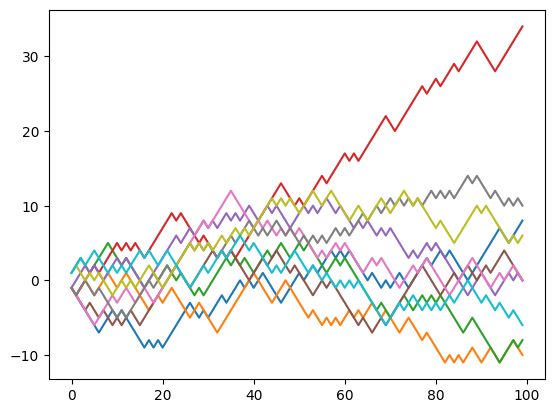

In [66]:
for i in range(num_walks):
  steps = np.random.choice([-1, 1], size=num_steps)
  walk = np.cumsum(steps)
  plt.plot(walk)